# Bono 3.1

Integrantes.

- Sofia Catalina Galindo Mora.
- Anamaria Leguizamón
- Diego Herrera


## Web Scrapping

In [ ]:
import pandas as pd
#importar pandas, no  se utiliza selenium ya que la oinformacion esta en formato tabla y se puede extraer facilmente.

tablas = pd.read_html("https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoodpop.htm")

In [ ]:
#Obtenemos la primera tabla
df  = tablas[0]

In [ ]:
# Revisamos que se haya cargado correctamente
df.head()

,Borough,region,Males,Females,Total Population
0,Bronx,"Riverdale, Fieldston & Kingsbridge",52133,61937,114070
1,NaN,"Wakefield, Williamsbridge & Woodlawn",65087,77848,142935
2,NaN,"Co-op City, Pelham Bay & Schuylerville",55615,65929,121544
3,NaN,"Pelham Parkway, Morris Park & Laconia",61233,67896,129130
4,NaN,"Belmont, Crotona Park East & East Tremont",75963,87740,163704


In [ ]:
# Llenar los valores nulos con forward fill, esto llena los valores nulos siguientes con el valor no nulo anterior
df['Borough'] = df['Borough'].ffill()  

In [ ]:
df

,Borough,region,Males,Females,Total Population
0,Bronx,"Riverdale, Fieldston & Kingsbridge",52133,61937,114070
1,Bronx,"Wakefield, Williamsbridge & Woodlawn",65087,77848,142935
2,Bronx,"Co-op City, Pelham Bay & Schuylerville",55615,65929,121544
3,Bronx,"Pelham Parkway, Morris Park & Laconia",61233,67896,129130
4,Bronx,"Belmont, Crotona Park East & East Tremont",75963,87740,163704
5,Bronx,"Bedford Park, Fordham North & Norwood",62664,68016,130681
6,Bronx,"Morris Heights, Fordham South & Mount Hope",64748,71644,136391
7,Bronx,"Concourse, Highbridge & Mount Eden",67535,74968,142504
8,Bronx,"Castle Hill, Clason Point & Parkchester",87605,99401,187006
9,Bronx,"Hunts Point, Longwood & Melrose",80447,78645,159091


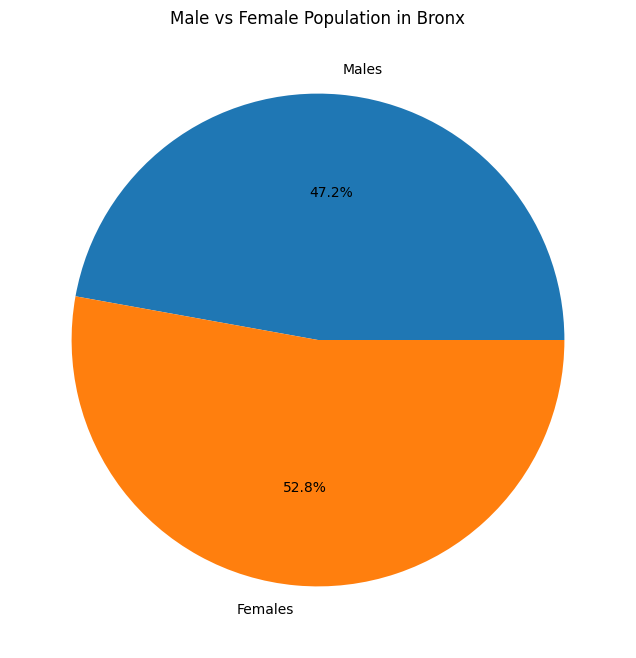

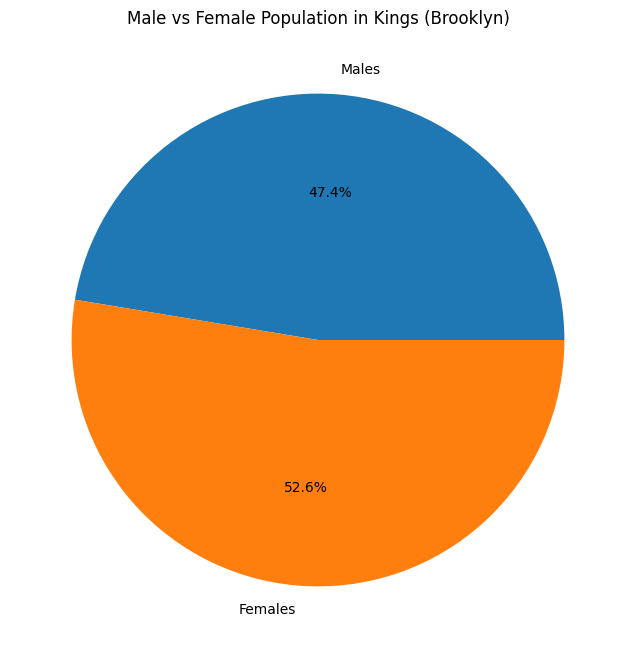

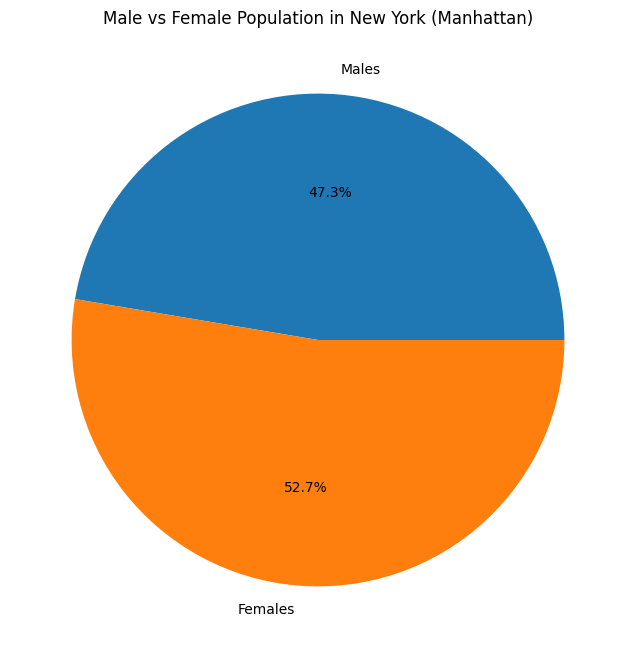

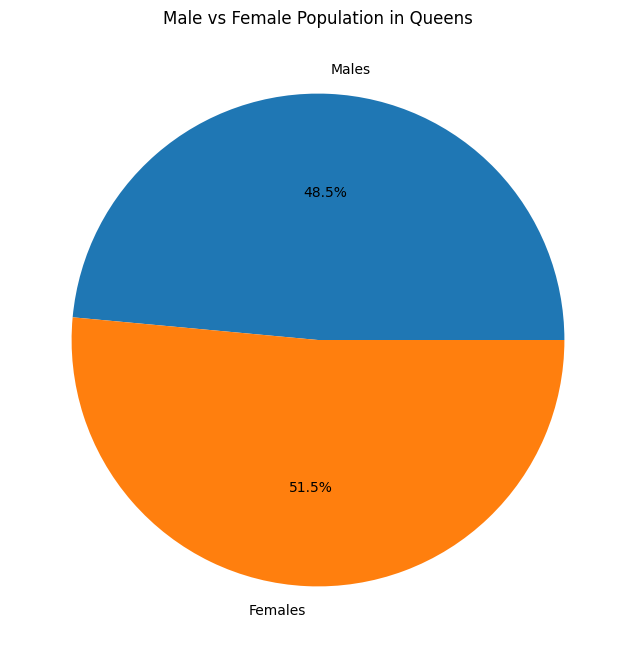

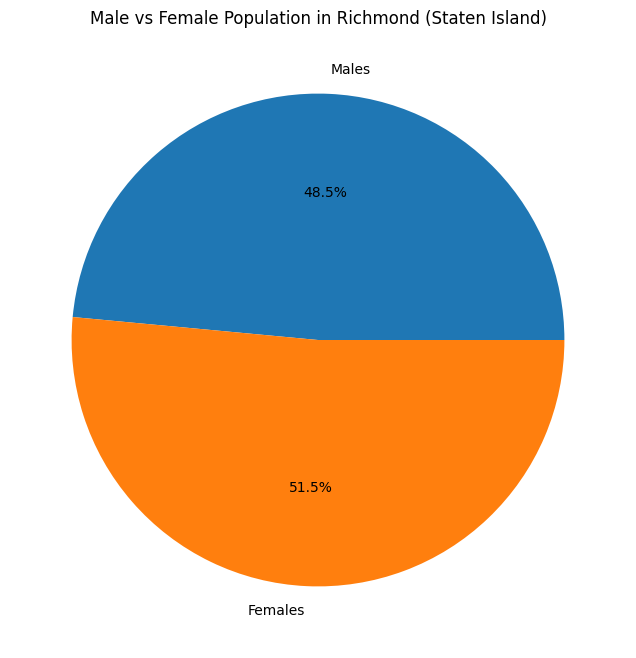

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hombres y Mujeres en cada Localidad 
boroughs = df['Borough'].unique()
for borough in boroughs:
    borough_data = df[df['Borough'] == borough].sum()
    plt.figure(figsize=(8, 8))
    plt.pie([borough_data['Males'], borough_data['Females']], labels=['Males', 'Females'], autopct='%1.1f%%')
    plt.title(f'Male vs Female Population in {borough}')
    plt.show()

**Se puede concluir que en general el porcentaje de mujeres es mayor que el de los hombres en cada localidad.**


## API

In [ ]:
CONST_WEATHER_API_KEY="-AQUI-VA-EL-API-KEY" #API KEY, utilizada para rastrear y controlar cómo se utiliza la API

In [ ]:
#Probar Llamado al API

import requests

def get_weather(lat, lon, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}" #Función que toma latitud, longitud y API Key
    response = requests.get(url)
    return response.json()

#En este caso se usan los datos de New York
latitude = '40.712776'
longitude = '-74.005974'

# llamar la función para obtener los datos
weather_data = get_weather(latitude, longitude, CONST_WEATHER_API_KEY)

# Verificar que el llamada sea exitoso, es decir 200
if weather_data.get('cod') == 200:
    print("Successfully retrieved weather data:")
    print(weather_data)
else:
    print("Failed to retrieve weather data. Error code:", weather_data.get('cod'))


Successfully retrieved weather data:
{'coord': {'lon': -74.006, 'lat': 40.7128}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 280.09, 'feels_like': 276.09, 'temp_min': 278.94, 'temp_max': 280.91, 'pressure': 1014, 'humidity': 89}, 'visibility': 8047, 'wind': {'speed': 7.2, 'deg': 50, 'gust': 9.77}, 'clouds': {'all': 100}, 'dt': 1712104803, 'sys': {'type': 2, 'id': 2008101, 'country': 'US', 'sunrise': 1712054218, 'sunset': 1712100093}, 'timezone': -14400, 'id': 5128581, 'name': 'New York', 'cod': 200}


Humedad vs Nubosidad

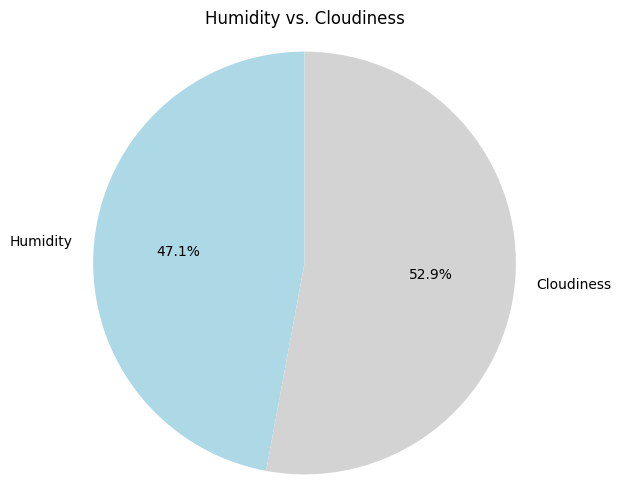

In [ ]:
#Visualización
def plot_humidity_cloudiness(data):
    """Plot humidity and cloudiness as a pie chart."""
    humidity = data['main']['humidity']
    cloudiness = data['clouds']['all']

    sizes = [humidity, cloudiness]
    labels = ['Humidity', 'Cloudiness']
    colors = ['lightblue', 'lightgrey']

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Humidity vs. Cloudiness')
    plt.show()

plot_humidity_cloudiness(weather_data)

#El grafico se compara la Humedad y la Nubosidad
#Actualmente 02/04/2024 la nubosidad es mayor que la humedad